In [1]:
import pandas as pd

data = pd.read_csv('FULLDATA.csv')
DF = pd.DataFrame(data=data)

DF

,Unnamed: 0,Month,Day,GHI,Temperature,Solar Zenith Angle,Surface Albedo,DHI,power
0,0,3,6,219,16.0,93.0,40.534535,95.0,0.004556
1,1,3,7,259,17.0,93.0,40.534535,54.0,51.171986
2,2,3,8,214,18.0,93.0,40.534535,97.0,51.171986
3,3,3,9,213,18.0,92.0,40.534535,85.0,51.171986
4,4,3,10,259,18.0,92.0,40.534535,70.0,51.171986
...,...,...,...,...,...,...,...,...,...
661,661,12,27,182,9.0,373.0,22.000000,105.0,50.780389
662,662,12,28,177,10.0,349.0,25.000000,105.0,51.184018
663,663,12,29,174,9.0,325.0,30.000000,105.0,49.292800
664,664,12,30,172,9.0,316.0,32.000000,105.0,49.712401


In [2]:
X = data.iloc[:,2:-1].values 
Y = data.iloc[:,-1].values # power

In [3]:
from sklearn.model_selection import train_test_split

X_trian,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=12)

## model1 RandomForestRegressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error


model1 = RandomForestRegressor(n_estimators=250).fit(X_trian,Y_train)
Ypred1 = model1.predict(X_test)
print(r2_score(Y_test,Ypred1))
print(mean_squared_error(Y_test,Ypred1))

0.6586809980918675
38.09089569180495


C:\Users\Top\AppData\Local\Temp\ipykernel_10092\1695357639.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(XX, YY)


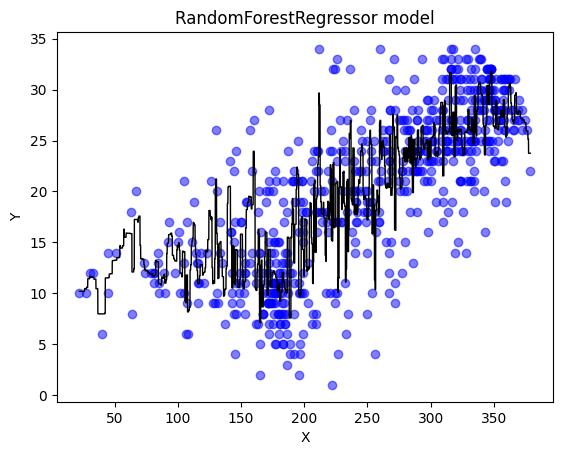

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

Sx1 = StandardScaler()

XX = Sx1.fit_transform(data.iloc[:,3].values.reshape(-1,1))
YY = Sx1.transform(data.iloc[:,4].values.reshape(-1,1))
model1.fit(XX, YY)


X_grid = np.arange(min(Sx1.inverse_transform(XX)), max(Sx1.inverse_transform(XX)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Sx1.inverse_transform(XX), Sx1.inverse_transform(YY), color = 'blue',alpha=0.5)
plt.plot(X_grid, Sx1.inverse_transform(model1.predict(Sx1.transform(X_grid)).reshape(-1,1)), color = 'black',linewidth=1)
plt.title('RandomForestRegressor model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## model2 LinearRegression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

model2 = LinearRegression().fit(X_trian,Y_train)
YGpred2 = model2.predict(X_test)
print(r2_score(Y_test,YGpred2))
print(mean_squared_error(Y_test,YGpred2))

0.5939012617911532
45.32025639126372


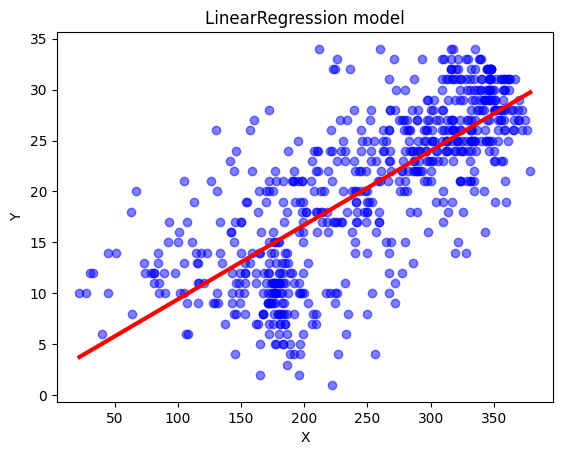

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

Sx1 = StandardScaler()

XX = Sx1.fit_transform(data.iloc[:,3].values.reshape(-1,1))
YY = Sx1.transform(data.iloc[:,4].values.reshape(-1,1))
model2.fit(XX, YY)


X_grid = np.arange(min(Sx1.inverse_transform(XX)), max(Sx1.inverse_transform(XX)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Sx1.inverse_transform(XX), Sx1.inverse_transform(YY), color = 'blue',alpha=0.5)
plt.plot(X_grid, Sx1.inverse_transform(model2.predict(Sx1.transform(X_grid)).reshape(-1,1)), color = 'red',linewidth=3)
plt.title('LinearRegression model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## model3 SVR

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc_X = StandardScaler()
sc_y = StandardScaler()
XGT_trian = sc_X.fit_transform(X_trian)
YGT_train = sc_y.fit_transform(Y_train.reshape(-1,1))

model3 = SVR(kernel = 'poly')
model3.fit(XGT_trian, YGT_train)
YGpred3 = sc_y.inverse_transform(model3.predict(sc_X.transform(X_test)).reshape(-1,1))
print(r2_score(Y_test,YGpred3))
print(mean_squared_error(Y_test,YGpred3))

0.612203835392711
43.277705528138426


c:\Users\Top\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Top\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


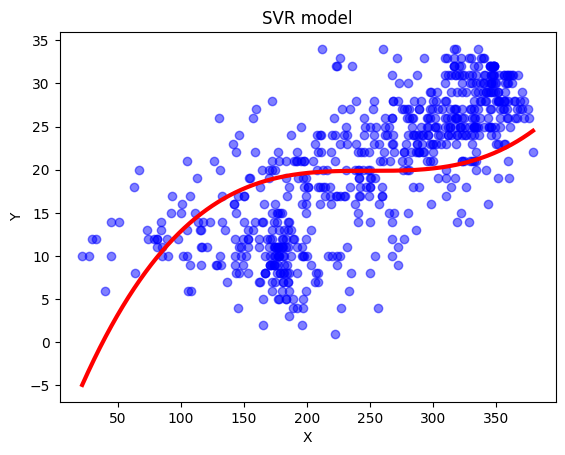

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

Sx1 = StandardScaler()

XX = Sx1.fit_transform(data.iloc[:,3].values.reshape(-1,1))
YY = Sx1.transform(data.iloc[:,4].values.reshape(-1,1))
model3.fit(XX, YY)


X_grid = np.arange(min(Sx1.inverse_transform(XX)), max(Sx1.inverse_transform(XX)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Sx1.inverse_transform(XX), Sx1.inverse_transform(YY), color = 'blue',alpha=0.5)
plt.plot(X_grid, Sx1.inverse_transform(model3.predict(Sx1.transform(X_grid)).reshape(-1,1)), color = 'red',linewidth=3)
plt.title('SVR model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()